In [99]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from typing import Tuple

In [108]:
img_num = 4
photos = [cv2.imread('test-images/' + name, cv2.COLOR_BGR2RGB) for name in [
    'mountain_1.jpg',
    'mountain_2.jpg',
    'mountain_3.jpg',
    'mountain_4.jpg'
]]


In [109]:
def show_image(image: np.ndarray, fig_size: Tuple[int, int] = (10, 5)) -> None:
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=fig_size)
    plt.imshow(image_rgb)
    plt.show()

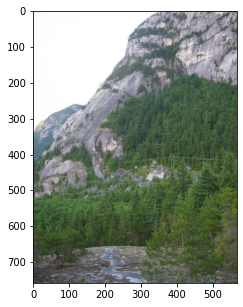

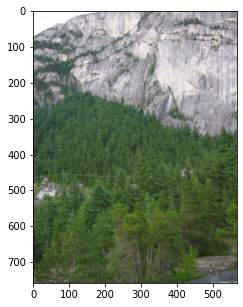

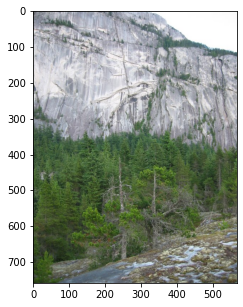

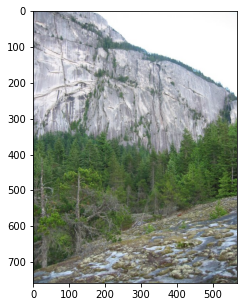

In [110]:
for photo in photos:
    show_image(photo)

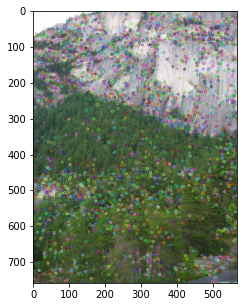

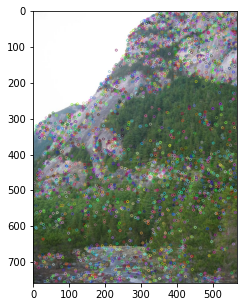

In [115]:
img_1, img_2 = photos[1], photos[0]
img1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

img1_keypoint, img2_keypoint = np.empty_like(img_1), np.empty_like(img_2)
cv2.drawKeypoints(img_1, kp1, img1_keypoint)
show_image(img1_keypoint)
cv2.drawKeypoints(img_2, kp2, img2_keypoint)
show_image(img2_keypoint)


In [134]:
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)
matches = np.array([m for m in matches if m[0].distance < 0.5 * m[1].distance])

Let's take a look on the matches (will try just shortest 100 matches for better visibility)

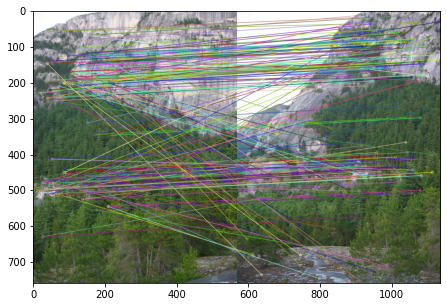

In [133]:
img3 = cv2.drawMatchesKnn(
    img_1, kp1, img_2, kp2,
    sorted(matches, key = lambda x: x[0].distance)[:100],
    None, flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS
)
show_image(img3)

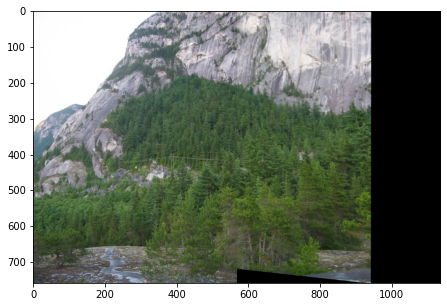

In [135]:
assert len(matches[:,0]) >= 4, "There aren't enough keypoints."

src = np.float32([ kp1[m.queryIdx].pt for m in matches[:,0] ]).reshape(-1,1,2)
dst = np.float32([ kp2[m.trainIdx].pt for m in matches[:,0] ]).reshape(-1,1,2)
H, masked = cv2.findHomography(src, dst, cv2.RANSAC, 5.0)

dst = cv2.warpPerspective(img_1, H, ((img_1.shape[1] + img_2.shape[1]), img_2.shape[0])) #wraped image
dst[0:img_2.shape[0], 0:img_2.shape[1]] = img_2

show_image(dst)
